In [1]:
import matplotlib.pyplot as plt

# Get the default property cycle from matplotlib rcParams
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print("Default Matplotlib colors:")
for i, color in enumerate(default_colors):
    print(f"{i}: {color}")

Default Matplotlib colors:
0: #1f77b4
1: #ff7f0e
2: #2ca02c
3: #d62728
4: #9467bd
5: #8c564b
6: #e377c2
7: #7f7f7f
8: #bcbd22
9: #17becf


In [2]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 9})

In [3]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import layers
import losses
import models
import utils

In [20]:
################################################################################
def print_job(
    alpha, beta, criterion, delta, deltaS, epochs, embedding_level, 
    experiments_directory, instance_conv, lr, N_test, N_train, N_val, pooling, 
    save, seed, use_pos_embedding, weight_decay
):
    model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    
    if os.path.exists(f'{experiments_directory}/{model_name}.csv'):
        temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
        if temp_df.shape[0] == epochs:
            return
    
    command = (
        f"python ../src/toy_data.py "
        f"--alpha={alpha} "
        f"--beta={beta} "
        f"--batch_size={batch_size} "
        f"--criterion='{criterion}' "
        f"--delta={delta} "
        f"--deltaS={deltaS} "
        f"--epochs={epochs} "
        f"{'--embedding_level ' if embedding_level else ''}"
        f"--experiments_directory='{experiments_directory}' "
        f"{'--instance_conv ' if instance_conv else ''}"
        f"--lr={lr} "
        f"--model_name='{model_name}' "
        f"--N_test={N_test} "
        f"--N_train={N_train} "
        f"--N_val={N_val} "
        f"--pooling='{pooling}' "
        f"{'--save ' if save else ''}"
        f"--seed={seed} "
        f"{'--use_pos_embedding ' if use_pos_embedding else ''}"
        f"--weight_decay={weight_decay}"
    )
    
    print(f'    "{command}"')

In [45]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [1.0]
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["L1"]
data_seed_test, data_seed_train, data_seed_val = 2, 0, 1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
deltaS = 3
epochs = 1000
embedding_level = False
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_instance_conv=True_instance_level=True" 
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_embedding_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_retry2" 
instance_conv = True
lrs = [0.1, 0.01, 0.001, 0.0001]
N_train = 400
N_test = 1000
N_val = 100
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["attention"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

#for alpha, criterion, delta, lr, pooling, seed in itertools.product(alphas, criterions, deltas, lrs, poolings, seeds):
for alpha, beta, criterion, delta, lr, pooling, seed in itertools.product(alphas, betas, criterions, deltas, lrs, poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 

    print_job(alpha, beta, criterion, delta, deltaS, epochs, embedding_level,
              temp_experiments_directory, instance_conv, lr, N_test, N_train, N_val, pooling, save, 
              seed, use_pos_embedding, weight_decay)

    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=0.5 --deltaS=3 --epochs=1000 --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_retry2/delta=0.5_deltaS=3_S_low=15_S_high=46/data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=400_N_val=100' --instance_conv --lr=0.1 --model_name='alpha=1.0_criterion=L1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False' --N_test=1000 --N_train=400 --N_val=100 --pooling='attention' --seed=1001 --weight_decay=0.0"
    "python ../src/toy_data.py --alpha=1.0 --batch_size=64 --criterion='L1' --delta=0.5 --deltaS=3 --epochs=1000 --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_retry2/delta=0.5_deltaS=3_S_low=15_S_high=46/data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=400_N_val=100' --instance_conv --lr=0.01 --model_name='alpha=1.0_criterion=L1_lr=0.01_pooling=attention_seed=1001_use_pos_emb

In [5]:
# Varying N
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [1.0]
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["GuidedL1"]
data_seed_test, data_seed_train, data_seed_val = 2, 0, 1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
deltaS = 3
epochs = 1000
embedding_level = True
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_instance_conv=True_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_embedding_level=True_use_pos_embedding=False" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_Delta_retry2" 
instance_conv = True
lrs = [0.1, 0.01, 0.001, 0.0001]
N_train = 400
N_test = 1000
N_val = 100
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["attention"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

columns = ["model_name", "Delta", "seed", "test_acc", "test_auroc", "test_auprc", "test_loss", "test_nll", "train_acc", "train_auroc", "train_auprc", "train_loss", "train_nll", "val_acc", "val_auroc", "val_auprc", "val_loss", "val_nll"]
df = pd.DataFrame(columns=columns)

#for alpha, criterion, delta, lr, pooling, seed in itertools.product(alphas, criterions, deltas, lrs, poolings, seeds):
for alpha, beta, criterion, delta, lr, pooling, seed in itertools.product(alphas, betas, criterions, deltas, lrs, poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 
    #model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"

    if os.path.exists(f"{temp_experiments_directory}/{model_name}.csv"):
        temp_df = pd.read_csv(f"{temp_experiments_directory}/{model_name}.csv")
        if len(temp_df[temp_df.train_auroc>temp_df.val_auroc]):
            index = temp_df[temp_df.train_auroc>temp_df.val_auroc].val_auroc.idxmax()
            row = [model_name, delta, seed, temp_df.test_acc.values[index], temp_df.test_auroc.values[index], temp_df.test_auprc.values[index], temp_df.test_loss.values[index], temp_df.test_nll.values[index], temp_df.train_acc.values[index], temp_df.train_auroc.values[index], temp_df.train_auprc.values[index], temp_df.train_loss.values[index], temp_df.train_nll.values[index], temp_df.val_acc.values[index], temp_df.val_auroc.values[index], temp_df.val_auprc.values[index], temp_df.val_loss.values[index], temp_df.val_nll.values[index]]
            df.loc[len(df)] = row
        
indices = df.groupby(["Delta", "seed"])["val_auroc"].idxmax()
df = df.loc[indices].reset_index(drop=True)
df

,model_name,Delta,seed,test_acc,test_auroc,test_auprc,test_loss,test_nll,train_acc,train_auroc,train_auprc,train_loss,train_nll,val_acc,val_auroc,val_auprc,val_loss,val_nll


In [26]:
df.test_auroc.values

array([0.48546225, 0.70013922, 0.80511814, 0.92696136, 0.98031098,
       0.99581897, 0.99989593, 0.99999988, 0.99999988, 0.99999994])

In [42]:
df.model_name.values

array(['alpha=0.01_beta=1.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=1.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=10.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=1.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=10.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=1.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=10.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=10.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta=10.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False',
       'alpha=0.01_beta

In [175]:
# Varying N
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [100.0]
batch_size = 64
#criterions = ['L1', 'L2']
criterions = ['GuidedL1']
delta = 2.0
deltaS = 3
epochs = 1000
embedding_level = True
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_instance_level=True" 
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_instance_conv=True_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_retry3" 
instance_conv = True
lrs = [0.1, 0.01, 0.001, 0.0001]
N_trains = [100, 158, 251, 398, 630, 1000]#, 1584, 2511, 3981, 6309, 10000]
#N_trains = [1584, 2511, 3981, 6309, 10000]
N_test = 1000
N_vals = [25, 39, 62, 99, 157, 250]#, 396, 627, 995, 1577, 2500]
#N_vals = [396, 627, 995, 1577, 2500]
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["attention"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

#for alpha, criterion, lr, (N_train, N_val), pooling, seed in itertools.product(alphas, criterions, lrs, zip(N_trains, N_vals), poolings, seeds):
for alpha, beta, criterion, lr, (N_train, N_val), pooling, seed in itertools.product(alphas, betas, criterions, lrs, zip(N_trains, N_vals), poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 
    
    print_job(alpha, beta, criterion, delta, deltaS, epochs, embedding_level,
              temp_experiments_directory, instance_conv, lr, N_test, N_train, N_val, pooling, 
              save, seed, use_pos_embedding, weight_decay)

    "python ../src/toy_data.py --alpha=1.0 --beta=100.0 --batch_size=64 --criterion='GuidedL1' --delta=2.0 --deltaS=3 --epochs=1000 --embedding_level --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_retry3/delta=2.0_deltaS=3_S_low=15_S_high=46/data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=100_N_val=25' --instance_conv --lr=0.1 --model_name='alpha=1.0_beta=100.0_criterion=GuidedL1_lr=0.1_pooling=attention_seed=1001_use_pos_embedding=False' --N_test=1000 --N_train=100 --N_val=25 --pooling='attention' --seed=1001 --weight_decay=0.0"
    "python ../src/toy_data.py --alpha=1.0 --beta=100.0 --batch_size=64 --criterion='GuidedL1' --delta=2.0 --deltaS=3 --epochs=1000 --embedding_level --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_retry3/delta=2.0_deltaS=3_S_low=15_S_high=46/data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=158_N_val=39' --instance_conv --lr=0.1 --mod

In [10]:
# Varying N
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
betas = [10.0]
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["L1"]
delta = 2.0
deltaS = 3
epochs = 1000
embedding_level = False
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N" 
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_instance_level=True" 
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_instance_conv=True_instance_level=True" 
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_embedding_level=True" 
#experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_retry3" 
instance_conv = True
lrs = [0.1, 0.01, 0.001, 0.0001]
N_trains = [100, 158, 251, 398, 630, 1000, 1584, 2511, 3981, 6309, 10000]
N_test = 1000
N_vals = [25, 39, 62, 99, 157, 250, 396, 627, 995, 1577, 2500]
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["transformer"]
save = False
seeds = [1001]
use_pos_embedding = False
weight_decay = 0.0

columns = ["model_name", "N_train", "seed", "test_acc", "test_auroc", "test_auprc", "test_loss", "test_nll", "train_acc", "train_auroc", "train_auprc", "train_loss", "train_nll", "val_acc", "val_auroc", "val_auprc", "val_loss", "val_nll"]
df = pd.DataFrame(columns=columns)

#for alpha, criterion, lr, (N_train, N_val), pooling, seed in itertools.product(alphas, criterions, lrs, zip(N_trains, N_vals), poolings, seeds):
for alpha, beta, criterion, lr, (N_train, N_val), pooling, seed in itertools.product(alphas, betas, criterions, lrs, zip(N_trains, N_vals), poolings, seeds):
    dataset_folder = f"delta={delta}_deltaS={deltaS}_S_low=15_S_high=46"
    datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test={N_test}_N_train={N_train}_N_val={N_val}"
    temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 
    model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    #model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"

    if os.path.exists(f"{temp_experiments_directory}/{model_name}.csv"):
        temp_df = pd.read_csv(f"{temp_experiments_directory}/{model_name}.csv")
        if len(temp_df[temp_df.train_auroc>temp_df.val_auroc]):
            index = temp_df[temp_df.train_auroc>temp_df.val_auroc].val_auroc.idxmax()
            row = [model_name, N_train, seed, temp_df.test_acc.values[index], temp_df.test_auroc.values[index], temp_df.test_auprc.values[index], temp_df.test_loss.values[index], temp_df.test_nll.values[index], temp_df.train_acc.values[index], temp_df.train_auroc.values[index], temp_df.train_auprc.values[index], temp_df.train_loss.values[index], temp_df.train_nll.values[index], temp_df.val_acc.values[index], temp_df.val_auroc.values[index], temp_df.val_auprc.values[index], temp_df.val_loss.values[index], temp_df.val_nll.values[index]]
            df.loc[len(df)] = row
        
indices = df.groupby(["N_train", "seed"])["val_auroc"].idxmax()
df = df.loc[indices].reset_index(drop=True)
df

,model_name,N_train,seed,test_acc,test_auroc,test_auprc,test_loss,test_nll,train_acc,train_auroc,train_auprc,train_loss,train_nll,val_acc,val_auroc,val_auprc,val_loss,val_nll
0,alpha=0.01_criterion=L1_lr=0.01_pooling=transf...,100,1001,0.492,0.533745,0.527065,31.265976,0.699297,0.531250,0.936765,0.930793,31.375854,0.692042,0.520000,0.907051,0.867204,31.260593,0.693914
1,alpha=0.01_criterion=L1_lr=0.01_pooling=transf...,158,1001,0.492,0.500442,0.517252,30.123268,0.693432,0.507812,0.697680,0.732570,30.288553,0.698357,0.641026,0.662857,0.505547,30.136602,0.706766
2,alpha=0.001_criterion=L1_lr=0.1_pooling=transf...,251,1001,0.614,0.748624,0.734880,4.017583,3.617070,0.963542,0.996623,0.997134,0.497543,0.088956,0.790323,0.883403,0.915800,1.984971,1.584457
3,alpha=0.0001_criterion=L1_lr=0.1_pooling=trans...,398,1001,0.748,0.824355,0.826179,1.658166,1.410029,1.000000,1.000000,1.000000,0.248980,0.000332,0.818182,0.931020,0.925626,0.890230,0.642093
4,alpha=1e-05_criterion=L1_lr=0.1_pooling=transf...,630,1001,0.757,0.852340,0.859137,1.137204,1.098767,1.000000,1.000000,1.000000,0.038576,0.000070,0.834395,0.906686,0.903129,0.829409,0.790971
5,alpha=0.001_criterion=L1_lr=0.1_pooling=transf...,1000,1001,0.735,0.832317,0.832377,6.471410,0.693110,0.986458,0.998954,0.998985,7.196095,0.056574,0.792000,0.884534,0.904269,6.285449,0.507149
6,alpha=0.001_criterion=L1_lr=0.1_pooling=transf...,1584,1001,0.782,0.888655,0.902024,1.572813,0.508804,0.924479,0.974359,0.975987,1.264978,0.206154,0.835859,0.914394,0.920178,1.487617,0.423607
7,alpha=0.001_criterion=L1_lr=0.01_pooling=trans...,2511,1001,0.768,0.849065,0.858628,20.946224,0.538204,0.907853,0.969263,0.972175,21.354275,0.237390,0.776715,0.864058,0.869793,20.920475,0.512455
8,alpha=0.001_criterion=L1_lr=0.01_pooling=trans...,3981,1001,0.773,0.876856,0.880862,19.961032,0.473211,0.847026,0.926666,0.930300,20.880520,0.346307,0.802010,0.889268,0.892336,19.925087,0.437265
9,alpha=0.0001_criterion=L1_lr=0.1_pooling=trans...,6309,1001,0.778,0.874868,0.868519,1.501516,1.433845,0.975287,0.997290,0.997473,0.131776,0.066269,0.798985,0.907145,0.905810,1.138528,1.070857


In [11]:
df.model_name.values

array(['alpha=0.01_criterion=L1_lr=0.01_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.01_criterion=L1_lr=0.01_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.0001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=1e-05_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.001_criterion=L1_lr=0.01_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.001_criterion=L1_lr=0.01_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.0001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=1e-05_criterion=L1_lr=

In [173]:
df.test_auroc.values

array([0.78119999, 0.59381402, 0.69866288, 0.75345886, 0.76159096,
       0.78237629])

In [198]:
N_train = 251
batch_size = 64
steps_per_epoch = int(N_train / batch_size)
epochs = int(100_000 / steps_per_epoch)
print(steps_per_epoch * epochs)
print(epochs)

99999
33333


python ../src/toy_data.py --alpha=1e-05 --batch_size=64 --criterion='L1' --delta=2.0 --deltaS=3 --epochs=1000 --embedding_level --experiments_directory='/cluster/tufts/hugheslab/eharve06/pooling/experiments/test' --lr=0.1 --model_name='alpha=1e-05_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False' --N_test=1000 --N_train=10000 --N_val=2500 --pooling='transformer' --save --seed=1001 --weight_decay=0.0

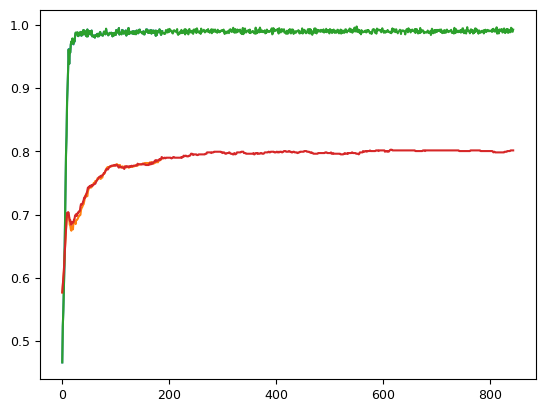

In [230]:
experiments_directory = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/varying_N_retry3" 
dataset_folder = f"delta=2.0_deltaS=3_S_low=15_S_high=46"
datasplit_folder = f"data_seed_test=2_data_seed_train=0_data_seed_val=1_N_test=1000_N_train=251_N_val=62"
temp_experiments_directory = f"{experiments_directory}/{dataset_folder}/{datasplit_folder}" 

temp_df = pd.read_csv(f"{temp_experiments_directory}/alpha=0.01_beta=0.0_criterion=GuidedL1_lr=0.01_pooling=attention_seed=1001_use_pos_embedding=False.csv")
plt.plot(temp_df.epoch, temp_df.train_auroc)
plt.plot(temp_df.epoch, temp_df.val_auroc)

temp_df = pd.read_csv(f"{temp_experiments_directory}/alpha=0.01_beta=1.0_criterion=GuidedL1_lr=0.01_pooling=attention_seed=1001_use_pos_embedding=False.csv")
plt.plot(temp_df.epoch, temp_df.train_auroc)
plt.plot(temp_df.epoch, temp_df.val_auroc)
#plt.yscale("log")

plt.show()

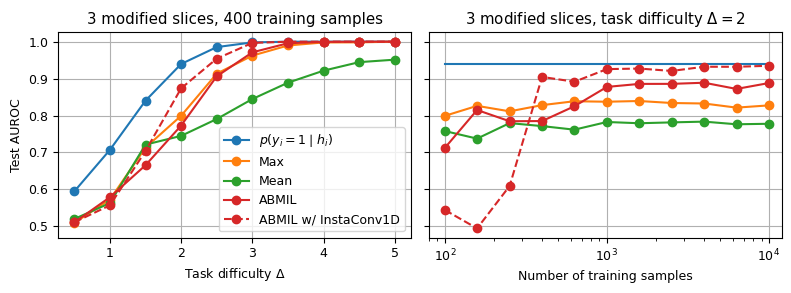

In [5]:
# L1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bayes_aurocs = [0.5946202278137207, 0.7070890069007874, 0.8402831554412842, 0.9396085739135742, 0.9853242635726929, 0.9980275630950928, 0.9998959302902222, 0.9999998807907104, 0.9999999403953552, 0.9999999403953552]
max_aurocs = [0.50939441, 0.5724225 , 0.71332663, 0.79945076, 0.91336578, 0.96227837, 0.98967338, 0.99791551, 0.9982276 , 0.99998796]
mean_aurocs = [0.51986909, 0.56306016, 0.72127265, 0.74496269, 0.79056633, 0.84471428, 0.88895154, 0.92152393, 0.9445619 , 0.95127153]
attention_aurocs = [0.51072675, 0.57890421, 0.66549838, 0.77291787, 0.90620798, 0.97115672, 0.99573481, 0.99939978, 0.99997991, 0.99999988]
instance_aurocs = [0.51105082, 0.55693656, 0.70407623, 0.87371171, 0.95402426, 0.99674314, 0.99983591, 0.99999988, 0.99999994, 0.99999994]

#instance_aurocs = [0.48546225, 0.70013922, 0.80511814, 0.92696136, 0.98031098, 0.99581897, 0.99989593, 0.99999988, 0.99999988, 0.99999994]

ncols, nrows = 2, 1
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharey=True)

axs[0].plot(deltas, bayes_aurocs, color="#1F77B4", label=r"$p(y_i=1 \mid h_i)$", marker="o")
axs[0].plot(deltas, max_aurocs, color="#FF7F0E", label="Max", marker="o")
axs[0].plot(deltas, mean_aurocs, color="#2CA02C", label="Mean", marker="o")
axs[0].plot(deltas, attention_aurocs, color="#D62728", label="ABMIL", marker="o")
axs[0].plot(deltas, instance_aurocs, color="#D62728", label="ABMIL w/ InstaConv1D", linestyle="--", marker="o")

axs[0].set_title("3 modified slices, 400 training samples")
axs[0].set_xlabel(r"Task difficulty $\Delta$")
axs[0].set_ylabel("Test AUROC")
axs[0].legend(loc="lower right")
axs[0].grid()

N_trains = [100, 158, 251, 398, 630, 1000, 1584, 2511, 3981, 6309, 10000]
bayes_aurocs = [0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742]
max_aurocs = [0.79922861, 0.82617551, 0.81138778, 0.82818407, 0.83871472, 0.8374024, 0.83935493, 0.8339535 , 0.83258915, 0.82142228, 0.82751989]
mean_aurocs = [0.75799811, 0.73751485, 0.77952754, 0.77141953, 0.76173103, 0.78252029, 0.77914345, 0.78147614, 0.78352463, 0.7763468, 0.77771914]
attention_aurocs = [0.71253049, 0.8149966 , 0.78454089, 0.78508896, 0.82515526, 0.8774966, 0.88565868, 0.88576275, 0.88885957, 0.87204719, 0.88799542]
instance_aurocs = [0.54418731, 0.49448657, 0.60938799, 0.90453953, 0.89152825, 0.92568898, 0.92719746, 0.92076778, 0.93211067, 0.93202257, 0.93477529]

#instance_aurocs = [0.91834712, 0.9083125, 0.89051795, 0.92476475, 0.929618, 0.94173712]
#guided_aurocs = [0.91032106, 0.90911275, 0.91150135, 0.92659324, 0.93122631, 0.94162112]

axs[1].plot(N_trains, bayes_aurocs, color="#1F77B4", label=r"$p(y_i=1 \mid h_i)$")
axs[1].plot(N_trains, max_aurocs, color="#FF7F0E", label="Max", marker="o")
axs[1].plot(N_trains, mean_aurocs, color="#2CA02C", label="Mean", marker="o")
axs[1].plot(N_trains, attention_aurocs, color="#D62728", label="ABMIL", marker="o")
axs[1].plot(N_trains, instance_aurocs, color="#D62728", label="ABMIL w/ InstaConv1D", linestyle="--", marker="o")

axs[1].set_title(r"3 modified slices, task difficulty $\Delta = 2$")
axs[1].set_xlabel("Number of training samples")
axs[1].set_xscale("log")
axs[1].set_xlim(80, 12000)
#axs[1].legend(loc="lower right")
axs[1].grid()

fig.tight_layout()
fig.savefig("instance-level_approach.pdf", bbox_inches="tight")
plt.show()

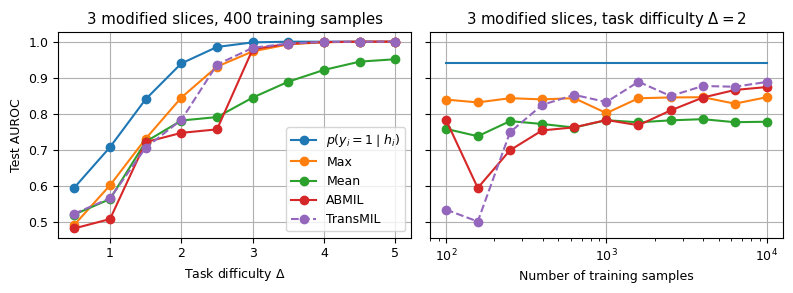

In [47]:
# L1
deltas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
bayes_aurocs = [0.5946202278137207, 0.7070890069007874, 0.8402831554412842, 0.9396085739135742, 0.9853242635726929, 0.9980275630950928, 0.9998959302902222, 0.9999998807907104, 0.9999999403953552, 0.9999999403953552]
max_aurocs = [0.49145383, 0.60111392, 0.73047101, 0.84476829, 0.93063831, 0.97298902, 0.99260211, 0.99847162, 0.99980396, 0.99997592]
mean_aurocs = [0.51998907, 0.56290013, 0.72213286, 0.78105593, 0.79056633, 0.84471625, 0.88895154, 0.92155594, 0.9445619 , 0.95127147]
attention_aurocs = [0.48145124, 0.50732589, 0.72098058, 0.74676311, 0.7564857, 0.97901058, 0.99417847, 0.99879968, 0.99997592, 0.99999994]
transformer_aurocs = [0.52236974, 0.56498867, 0.70559061, 0.78284842, 0.93642163, 0.98287159, 0.9947046 , 0.99934787, 0.99987584, 0.99999994]

ncols, nrows = 2, 1
fig, axs = plt.subplots(figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows, sharey=True)

axs[0].plot(deltas, bayes_aurocs, color="#1F77B4", label=r"$p(y_i=1 \mid h_i)$", marker="o")
axs[0].plot(deltas, max_aurocs, color="#FF7F0E", label="Max", marker="o")
axs[0].plot(deltas, mean_aurocs, color="#2CA02C", label="Mean", marker="o")
axs[0].plot(deltas, attention_aurocs, color="#D62728", label="ABMIL", marker="o")
axs[0].plot(deltas, transformer_aurocs, color="#9467BD", label="TransMIL", linestyle="--", marker="o")

axs[0].set_title("3 modified slices, 400 training samples")
axs[0].set_xlabel(r"Task difficulty $\Delta$")
axs[0].set_ylabel("Test AUROC")
axs[0].legend(loc="lower right")
axs[0].grid()

N_trains = [100, 158, 251, 398, 630, 1000, 1584, 2511, 3981, 6309, 10000]
bayes_aurocs = [0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742, 0.9396085739135742]
max_aurocs = [0.83920681, 0.83130884, 0.8430478 , 0.83972704, 0.84314382, 0.80154121, 0.84288782, 0.84505439, 0.84580052, 0.82786, 0.84583652]
mean_aurocs = [0.75799805, 0.73737478, 0.77939558, 0.77136952, 0.76157498, 0.78188413, 0.77605063, 0.78147614, 0.78476489, 0.77635074, 0.77766311]
attention_aurocs = [0.78364861, 0.59374005, 0.69853681, 0.75359094, 0.76203912, 0.78248435, 0.76786065, 0.8089931, 0.84469223, 0.86586171, 0.87401581]
transformer_aurocs = [0.53374463, 0.50044215, 0.74862361, 0.82435507, 0.85234016, 0.83231711, 0.88865548, 0.84906542, 0.87685645, 0.87486798, 0.8882314]
guided_aurocs = [0.58621806, 0.59374803, 0.69867885, 0.75299084, 0.76215518, 0.76561201]

axs[1].plot(N_trains, bayes_aurocs, color="#1F77B4", label=r"$p(y_i=1 \mid h_i)$")
axs[1].plot(N_trains, max_aurocs, color="#FF7F0E", label="Max", marker="o")
axs[1].plot(N_trains, mean_aurocs, color="#2CA02C", label="Mean", marker="o")
axs[1].plot(N_trains, attention_aurocs, color="#D62728", label="ABMIL", marker="o")
axs[1].plot(N_trains, transformer_aurocs, color="#9467BD", label="TransMIL", linestyle="--", marker="o")

axs[1].set_title(r"3 modified slices, task difficulty $\Delta = 2$")
axs[1].set_xlabel("Number of training samples")
axs[1].set_xscale("log")
#axs[1].legend(loc="lower right")
axs[1].grid()

fig.tight_layout()
fig.savefig("embedding-level_approach.pdf", bbox_inches="tight")
plt.show()